In [22]:
import numpy as np
import pandas as pd

In [54]:
import os

csv_path = os.path.join('..', 'data', 'country_name.csv')
df_country = pd.read_csv(csv_path)
df_country = df_country[['zh_CN', 'en_US']]
df_country

,zh_CN,en_US
0,阿鲁巴,Aruba
1,阿富汗,Afghanistan
2,安哥拉,Angola
3,安圭拉,Anguilla
4,奥兰群岛,Åland Islands
...,...,...
244,萨摩亚,Samoa
245,也门,Yemen
246,南非,South Africa
247,赞比亚,Zambia


In [55]:
all_countries = df_country['zh_CN'].tolist()
print(f"Get {len(all_countries)} countries")
print("Example:", all_countries[:10])

Get 249 countries
Example: ['阿鲁巴', '阿富汗', '安哥拉', '安圭拉', '奥兰群岛', '阿尔巴尼亚', '安道尔', '阿拉伯联合酋长国', '阿根廷', '亚美尼亚']


In [56]:
from gensim.models import KeyedVectors

model_1 = KeyedVectors.load("tencent_vectors.gensim")


In [57]:
available_countries = [c for c in all_countries if c in model_1.key_to_index]

print(f"Original number of countries: {len(all_countries)}")
print(f"Available countries in the model: {len(available_countries)}")

Original number of countries: 249
Available countries in the model: 142


In [58]:
country_vectors = [model_1[country] for country in available_countries]

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

# List to numpy array
vector_matrix = np.array(country_vectors)

# Calculating similarity
similarity_matrix = cosine_similarity(vector_matrix)

# Numpy array to dataframe
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=available_countries,
    columns=available_countries
)

print(similarity_df.iloc[:5, :5])

           阿富汗       安哥拉       阿根廷      亚美尼亚       南极洲
阿富汗   1.000000  0.706377  0.506424  0.636213  0.464104
安哥拉   0.706377  1.000000  0.603961  0.550597  0.485274
阿根廷   0.506424  0.603961  1.000000  0.591384  0.478596
亚美尼亚  0.636213  0.550597  0.591384  1.000000  0.400348
南极洲   0.464104  0.485274  0.478596  0.400348  1.000000


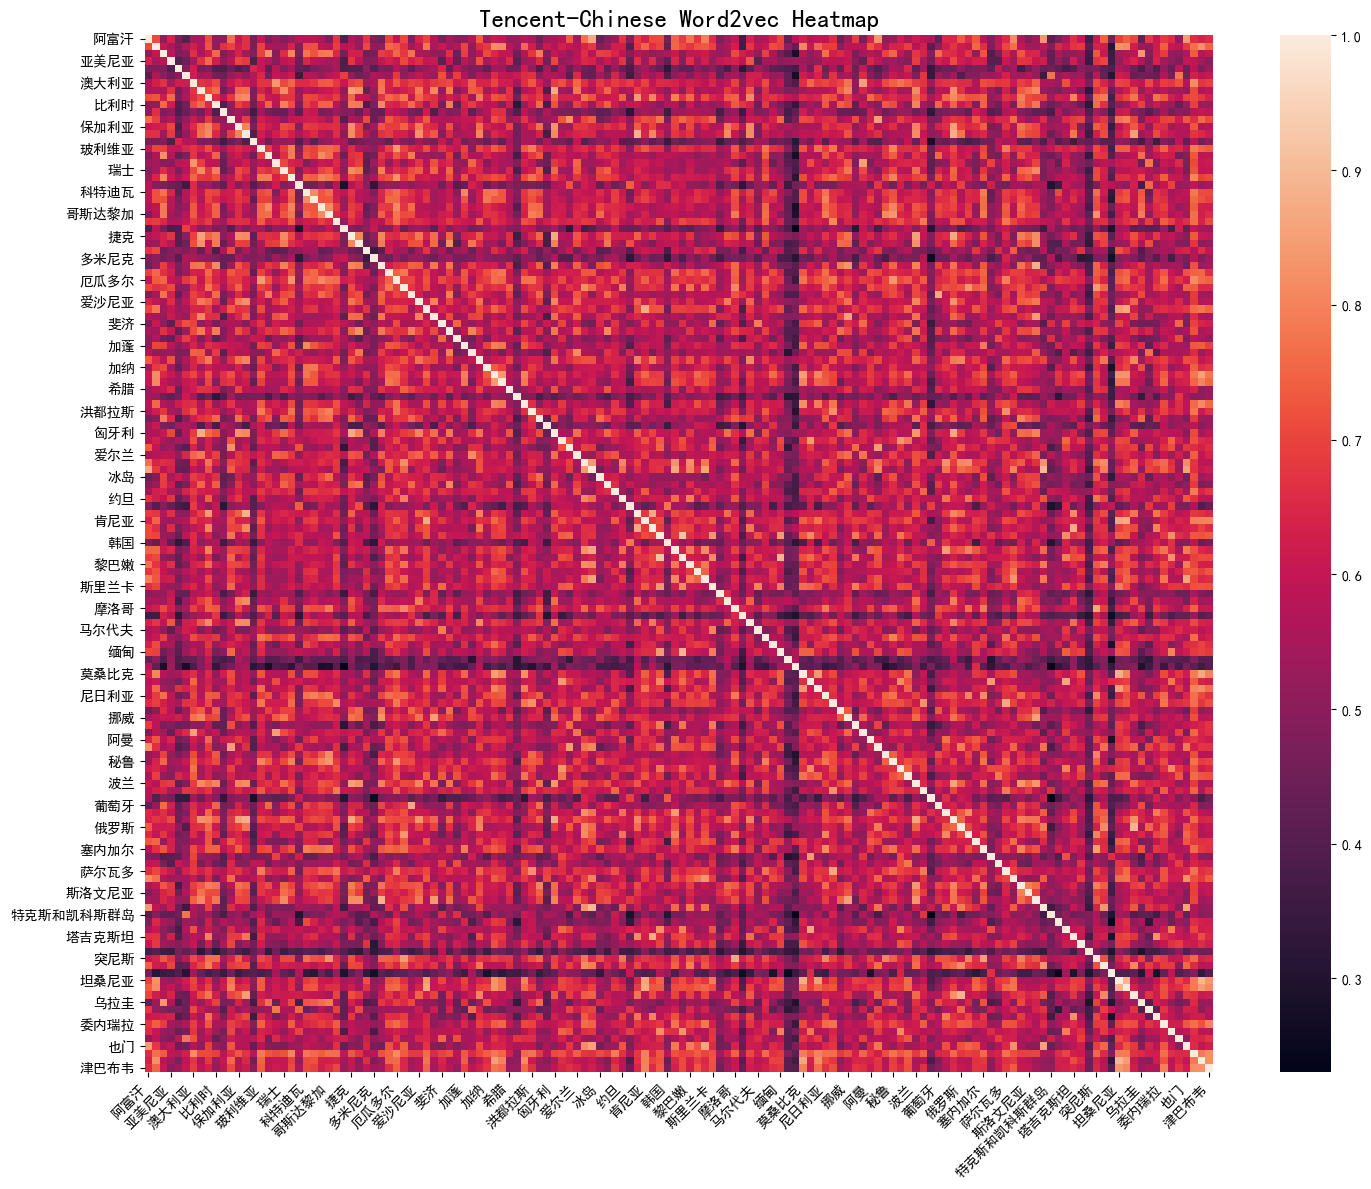

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def plot_similarity_heatmap(df):
    plt.figure(figsize=(15, 12))
    sns.heatmap(
        df,
        #annot=False,
        #fmt=".2f",
        #cmap=None, 
        #linewidths=.5,
        #linecolor=None,
        #cbar_kws={'label': 'Word2vec 余弦相似度'}
    )
    
    plt.title('Tencent-Chinese Word2vec Heatmap', fontsize=18)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_similarity_heatmap(similarity_df)

In [61]:
keys_cn = df_country['zh_CN'].tolist()
values_en = df_country['en_US'].tolist()
name_mapping = dict(zip(keys_cn, values_en))
name_mapping

{'阿鲁巴': 'Aruba',
 '阿富汗': 'Afghanistan',
 '安哥拉': 'Angola',
 '安圭拉': 'Anguilla',
 '奥兰群岛': 'Åland Islands',
 '阿尔巴尼亚': 'Albania',
 '安道尔': 'Andorra',
 '阿拉伯联合酋长国': 'United Arab Emirates',
 '阿根廷': 'Argentina',
 '亚美尼亚': 'Armenia',
 '美属萨摩亚': 'American Samoa',
 '南极洲': 'Antarctica',
 '法属南部领地': 'French Southern Territories',
 '安提瓜和巴布达': 'Antigua & Barbuda',
 '澳大利亚': 'Australia',
 '奥地利': 'Austria',
 '阿塞拜疆': 'Azerbaijan',
 '布隆迪': 'Burundi',
 '比利时': 'Belgium',
 '贝宁': 'Benin',
 '荷属加勒比区': 'Caribbean Netherlands',
 '布基纳法索': 'Burkina Faso',
 '孟加拉国': 'Bangladesh',
 '保加利亚': 'Bulgaria',
 '巴林': 'Bahrain',
 '巴哈马': 'Bahamas',
 '波斯尼亚和黑塞哥维那': 'Bosnia & Herzegovina',
 '圣巴泰勒米': 'St. Barthélemy',
 '白俄罗斯': 'Belarus',
 '伯利兹': 'Belize',
 '百慕大': 'Bermuda',
 '玻利维亚': 'Bolivia',
 '巴西': 'Brazil',
 '巴巴多斯': 'Barbados',
 '文莱': 'Brunei',
 '不丹': 'Bhutan',
 '布韦岛': 'Bouvet Island',
 '博茨瓦纳': 'Botswana',
 '中非共和国': 'Central African Republic',
 '加拿大': 'Canada',
 '科科斯（基林）群岛': 'Cocos (Keeling) Islands',
 '瑞士': 'Switzerland',
 '智利': 'Chi

In [62]:
similarity_df_translated = similarity_df.rename(
    index=name_mapping,
    columns=name_mapping,
    inplace=False
)
print(similarity_df.iloc[:5, :5])

           阿富汗       安哥拉       阿根廷      亚美尼亚       南极洲
阿富汗   1.000000  0.706377  0.506424  0.636213  0.464104
安哥拉   0.706377  1.000000  0.603961  0.550597  0.485274
阿根廷   0.506424  0.603961  1.000000  0.591384  0.478596
亚美尼亚  0.636213  0.550597  0.591384  1.000000  0.400348
南极洲   0.464104  0.485274  0.478596  0.400348  1.000000


c:\Users\mao_d\Desktop\大三后期\言語と文化\final\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 244 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX}) missing from font(s) SimHei.
  fig.canvas.draw()
c:\Users\mao_d\Desktop\大三后期\言語と文化\final\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 244 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


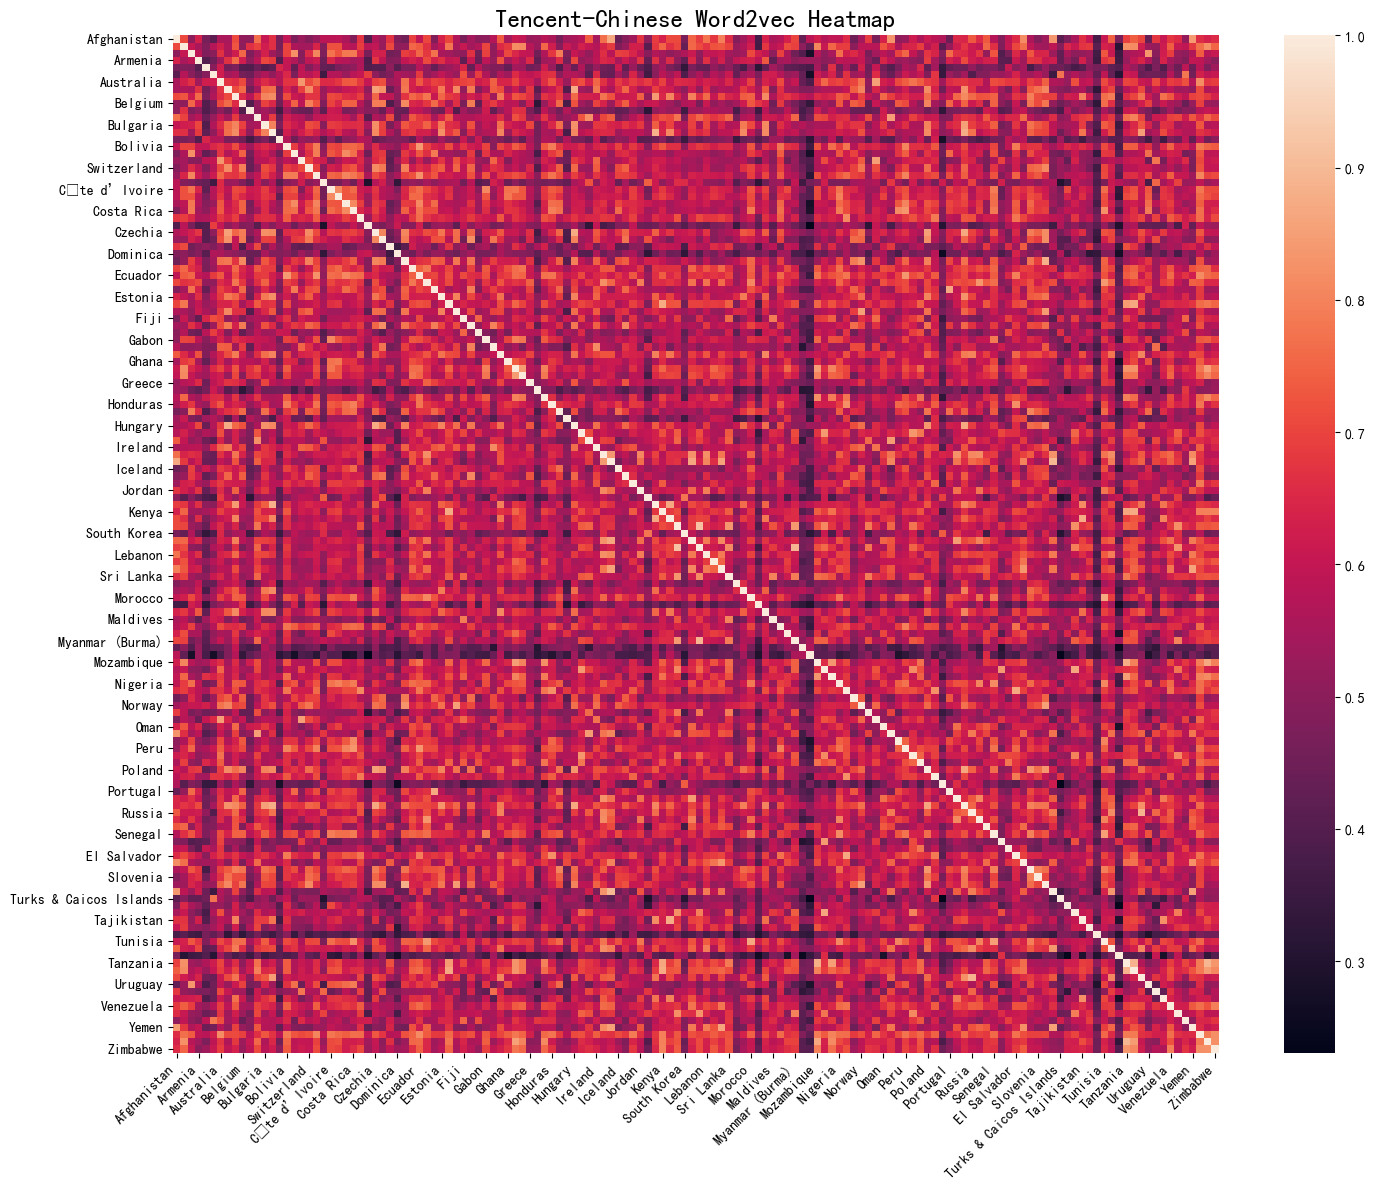

In [63]:
plot_similarity_heatmap(similarity_df_translated)

In [65]:
available_countries

['阿富汗',
 '安哥拉',
 '阿根廷',
 '亚美尼亚',
 '南极洲',
 '安提瓜和巴布达',
 '澳大利亚',
 '奥地利',
 '阿塞拜疆',
 '比利时',
 '贝宁',
 '孟加拉国',
 '保加利亚',
 '白俄罗斯',
 '百慕大',
 '玻利维亚',
 '巴西',
 '加拿大',
 '瑞士',
 '智利',
 '中国',
 '科特迪瓦',
 '喀麦隆',
 '哥伦比亚',
 '哥斯达黎加',
 '古巴',
 '库拉索',
 '捷克',
 '德国',
 '吉布提',
 '多米尼克',
 '丹麦',
 '阿尔及利亚',
 '厄瓜多尔',
 '埃及',
 '西班牙',
 '爱沙尼亚',
 '埃塞俄比亚',
 '芬兰',
 '斐济',
 '法国',
 '密克罗尼西亚',
 '加蓬',
 '英国',
 '格鲁吉亚',
 '加纳',
 '几内亚',
 '赤道几内亚',
 '希腊',
 '格林纳达',
 '圭亚那',
 '洪都拉斯',
 '克罗地亚',
 '海地',
 '匈牙利',
 '印度尼西亚',
 '印度',
 '爱尔兰',
 '伊朗',
 '伊拉克',
 '冰岛',
 '意大利',
 '牙买加',
 '约旦',
 '日本',
 '哈萨克斯坦',
 '肯尼亚',
 '吉尔吉斯斯坦',
 '柬埔寨',
 '韩国',
 '科威特',
 '老挝',
 '黎巴嫩',
 '利比里亚',
 '利比亚',
 '斯里兰卡',
 '立陶宛',
 '拉脱维亚',
 '摩洛哥',
 '摩纳哥',
 '摩尔多瓦',
 '马尔代夫',
 '墨西哥',
 '马里',
 '缅甸',
 '黑山',
 '蒙古',
 '莫桑比克',
 '马来西亚',
 '纳米比亚',
 '尼日利亚',
 '尼加拉瓜',
 '荷兰',
 '挪威',
 '尼泊尔',
 '新西兰',
 '阿曼',
 '巴基斯坦',
 '巴拿马',
 '秘鲁',
 '菲律宾',
 '巴布亚新几内亚',
 '波兰',
 '波多黎各',
 '朝鲜',
 '葡萄牙',
 '卡塔尔',
 '罗马尼亚',
 '俄罗斯',
 '沙特阿拉伯',
 '苏丹',
 '塞内加尔',
 '新加坡',
 '所罗门群岛',
 '萨尔瓦多',
 '索马里',
 '塞尔维亚',
 '斯洛文尼亚',
 '瑞典',
 '叙利亚',
 '特克斯和凯科斯群岛',

In [66]:
available_countries_in_english = [name_mapping[country] for country in available_countries if country in name_mapping]
available_countries_in_english

['Afghanistan',
 'Angola',
 'Argentina',
 'Armenia',
 'Antarctica',
 'Antigua & Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belgium',
 'Benin',
 'Bangladesh',
 'Bulgaria',
 'Belarus',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Canada',
 'Switzerland',
 'Chile',
 'China',
 'Côte d’Ivoire',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Curaçao',
 'Czechia',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Algeria',
 'Ecuador',
 'Egypt',
 'Spain',
 'Estonia',
 'Ethiopia',
 'Finland',
 'Fiji',
 'France',
 'Micronesia',
 'Gabon',
 'United Kingdom',
 'Georgia',
 'Ghana',
 'Guinea',
 'Equatorial Guinea',
 'Greece',
 'Grenada',
 'Guyana',
 'Honduras',
 'Croatia',
 'Haiti',
 'Hungary',
 'Indonesia',
 'India',
 'Ireland',
 'Iran',
 'Iraq',
 'Iceland',
 'Italy',
 'Jamaica',
 'Jordan',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'Kyrgyzstan',
 'Cambodia',
 'South Korea',
 'Kuwait',
 'Laos',
 'Lebanon',
 'Liberia',
 'Libya',
 'Sri Lanka',
 'Lithuania',
 'Latvia',
 'Morocco',
 'Monaco',
 'Moldov